# Assignment 7 - Compare Big Data (Vaex)
<a href="https://drive.google.com/file/d/1ZVnhW7TDB7PW62ewynEr5F1sOWp5meMa/view?usp=sharing"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# Group Members and Matriculation Numbers

1. **Member 1**
   - **Name:** Fauzan Aqil Bin Azman
   - **Matriculation Number:** A21EC0174

2. **Member 2**
   - **Name:** Muhammad Naquib Bin Zakaria
   - **Matriculation Number:** A20BE0161

3. **Member 3**
   - **Name:** Muhammad Ashraaf Bin Salleh
   - **Matriculation Number:** A21EC0068

4. **Member 4**
   - **Name:** Nik Amirul Ariff Bin Amran
   - **Matriculation Number:** A21EC0214

# Chess Game

**About Dataset**

Chess is one of the more famous board games of the world and one of the most studied. With it's more than 4 GB of information this can be a good opportunity to work with a huge dataset and practice on how to handle it.

**Content**

This dataset contains 6.25 Million chess games played on lichess.org during July of 2016.
Some of the games have Stockfish analysis evaluations like* [%eval 2.35] (235 centipawn advantage)* always from White's point of view. These are evaluations of the movement made by a player.

- Event: Game type.
- White: White's ID.
- Black: Black's ID.
- Result: Game Result (1-0 White wins) (0-1 Black wins)
- UTCDate: UTC Date.
- UTCTime: UTC Time.
- WhiteElo: White's ELO.
- BlackElo: Black's ELO.
- WhiteRatingDiff: White's rating points difference after the game.
- BlackRatingDiff: Blacks's rating points difference after the game.
- ECO: Opening in ECO encoding.
- Opening: Opening name.
- TimeControl: Time of the game for each player in seconds. The number after the increment is the number of seconds before the player's clock starts ticking in each turn.
- Termination: Reason of the game's end.
- AN: Movements in Movetext format.

## Downloading the Dataset



In [1]:
!pip install kaggle

In [2]:
from google.colab import files

files.upload()
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d arevel/chess-games
!unzip -q chess-games.zip

Saving kaggle.json to kaggle.json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
chess-games.zip: Skipping, found more recently modified local copy (use --force to force download)
replace chess_games.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


Let's begin by downloading the data, and listing the files within the dataset.

In [3]:
!pip install vaex


In [4]:
import vaex
import pandas as pd
import time

# Specify the chunk size (adjust as needed)
chunk_size = 1_000_000  # for example, read 1 million rows at a time

# Read the dataset in chunks
is_first_iteration = True

for chunk_df in pd.read_csv('/content/chess_games.csv', chunksize=chunk_size):
    # Concatenate each chunk to the main DataFrame

    # Code to run on the first iteration
    if is_first_iteration:
        df = vaex.from_pandas(chunk_df)
        is_first_iteration = False  # Set to False to indicate that the first iteration has occurred

    else:
        # Convert Pandas DataFrame to Vaex DataFrame (df2_vaex)
        df2_vaex = vaex.from_pandas(chunk_df)

        # Concatenate Vaex and Pandas DataFrames
        df = vaex.concat([df, df2_vaex])

    # Display basic information about the final DataFrame
    print(df)

    # Display memory usage for the current chunk
    print("Memory Usage:")
    chunk_df.info(memory_usage='deep')

    # Measure computation time for the current chunk
    start_time = time.time()
    # Add your computation code here
    end_time = time.time()
    computation_time = end_time - start_time
    print(f"Computation Time: {computation_time} seconds")


#        Event             White            Black          Result    UTCDate     UTCTime    WhiteElo    BlackElo    WhiteRatingDiff    BlackRatingDiff    ECO    Opening                                        TimeControl    Termination    AN
0        Classical         eisaaaa          HAMID449       1-0       2016.06.30  22:00:01   1901        1896        11.0               -11.0              D10    Slav Defense                                   300+5          Time forfeit   '1. d4 d5 2. c4 c6 3. e3 a6 4. Nf3 e5 5. cxd5 e4...
1        Blitz             go4jas           Sergei1973     0-1       2016.06.30  22:00:01   1641        1627        -11.0              12.0               C20    King's Pawn Opening: 2.b3                      300+0          Normal         '1. e4 e5 2. b3 Nf6 3. Bb2 Nc6 4. Nf3 d6 5. d3 g...
2        Blitz tournament  Evangelistaizac  kafune         1-0       2016.06.30  22:00:02   1647        1688        13.0               -13.0              B01    Scandinavian Defen

The dataset has been downloaded and extracted.

## Data Preparation and Cleaning





Explore number of rows and columns

In [5]:
print("Number of rows:", len(df))
print("Number of columns:", len(df.columns))



Number of rows: 6256184
Number of columns: 15


Since columns White,Black,ECO,Opening,TimeControl,Termination and AN is not significantly included for data analysis, therefore we can drop those column

In [6]:
import vaex

# List of columns to drop
columns_to_drop = ['White','Black','ECO','Opening','TimeControl','Termination','AN']

# Drop the specified columns
df = df.drop(columns_to_drop)

# Display the updated DataFrame
print(df)




#          Event             Result    UTCDate     UTCTime    WhiteElo    BlackElo    WhiteRatingDiff    BlackRatingDiff
0          Classical         1-0       2016.06.30  22:00:01   1901        1896        11.0               -11.0
1          Blitz             0-1       2016.06.30  22:00:01   1641        1627        -11.0              12.0
2          Blitz tournament  1-0       2016.06.30  22:00:02   1647        1688        13.0               -13.0
3          Correspondence    1-0       2016.06.30  22:00:02   1706        1317        27.0               -25.0
4          Blitz tournament  0-1       2016.06.30  22:00:02   1945        1900        -14.0              13.0
...        ...               ...       ...         ...        ...         ...         ...                ...
6,256,179  Blitz             1-0       2016.07.31  21:59:56   1248        1303        13.0               -17.0
6,256,180  Classical         1-0       2016.07.31  21:59:54   1328        1292        10.0               -

In [7]:
print(type(df))

<class 'vaex.dataframe.DataFrameLocal'>


Checking missing values for each column

In [8]:
# Check for missing values in each column
missing_values_column1 = df.Event.isnan().sum()

# Display missing values per column
print("Missing values per column:")
print(missing_values_column1)

Missing values per column:
0


In [9]:
# Check for missing values in each column
missing_values_column2 = df.Result.isnan().sum()

# Display missing values per column
print("Missing values per column:")
print(missing_values_column2)

Missing values per column:
0


In [10]:
# Check for missing values in each column
missing_values_column3 = df.UTCDate.isnan().sum()

# Display missing values per column
print("Missing values per column:")
print(missing_values_column3)

Missing values per column:
0


In [11]:
# Check for missing values in each column
missing_values_column4 = df.UTCTime.isnan().sum()

# Display missing values per column
print("Missing values per column:")
print(missing_values_column4)

Missing values per column:
0


In [12]:
# Check for missing values in each column
missing_values_column5 = df.WhiteElo.isnan().sum()

# Display missing values per column
print("Missing values per column:")
print(missing_values_column5)

Missing values per column:
0


In [13]:
# Check for missing values in each column
missing_values_column6 = df.BlackElo.isnan().sum()

# Display missing values per column
print("Missing values per column:")
print(missing_values_column6)

Missing values per column:
0


In [14]:

# Check for missing values in each column
missing_values_column7 = df.WhiteRatingDiff.isnan().sum()

# Display missing values per column
print("Missing values per column:")
print(missing_values_column7)

Missing values per column:
4668


In [15]:
# Check for missing values in each column
missing_values_per_column8 = df.BlackRatingDiff.isnan().sum()

# Display missing values per column
print("Missing values per column:")
print(missing_values_per_column8)

Missing values per column:
4668


Since there are missing values at WhiteRatingDiff and BlackRatingDiff, therefore we will remove those missing values from the dataset

In [16]:

# Drop rows with missing values in the 'WhiteRatingDiff' column
df_cleaned = df[df.WhiteRatingDiff.notna()]

# Display information about the cleaned DataFrame
print("Number of rows after dropping missing values:", len(df_cleaned))

Number of rows after dropping missing values: 6251516


In [17]:

# Drop rows with missing values in the 'WhiteRatingDiff' column
df_cleaned = df[df.BlackRatingDiff.notna()]

# Display information about the cleaned DataFrame
print("Number of rows after dropping missing values:", len(df_cleaned))

Number of rows after dropping missing values: 6251516


 Updated dataset after performing error handling

In [ ]:
df_cleaned

#,Event,Result,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff
0,Classical,1-0,2016.06.30,22:00:01,1901,1896,11.0,-11.0
1,Blitz,0-1,2016.06.30,22:00:01,1641,1627,-11.0,12.0
2,Blitz tournament,1-0,2016.06.30,22:00:02,1647,1688,13.0,-13.0
3,Correspondence,1-0,2016.06.30,22:00:02,1706,1317,27.0,-25.0
4,Blitz tournament,0-1,2016.06.30,22:00:02,1945,1900,-14.0,13.0
...,...,...,...,...,...,...,...,...
"6,251,511",Blitz,1-0,2016.07.31,21:59:56,1248,1303,13.0,-17.0
"6,251,512",Classical,1-0,2016.07.31,21:59:54,1328,1292,10.0,-11.0
"6,251,513",Bullet,0-1,2016.07.31,21:59:53,1660,1658,-11.0,11.0
"6,251,514",Bullet,0-1,2016.07.31,21:59:57,1726,1776,-8.0,9.0


## Exploratory Analysis and Visualization




import matplot library as we will perform visualization

In [22]:
import matplotlib.pyplot as plt

Summary Statistic

In [19]:
numeric_stats = df_cleaned.describe()
print(numeric_stats)

# Display memory usage for the current chunk
print("Memory Usage:")
chunk_df.info(memory_usage='deep')

# Measure computation time for the current chunk
start_time = time.time()
 # Add your computation code here
end_time = time.time()
computation_time = end_time - start_time
print(f"Computation Time: {computation_time} seconds")


             Event   Result  UTCDate  UTCTime            WhiteElo  \
data_type   string   string   string   string               int64   
count      6251516  6251516  6251516  6251516             6251516   
NA               0        0        0        0                   0   
mean            --       --       --       --  1741.9246147654426   
std             --       --       --       --          267.546664   
min             --       --       --       --                 737   
max             --       --       --       --                3110   

                   BlackElo     WhiteRatingDiff       BlackRatingDiff  
data_type             int64             float64               float64  
count               6251516             6251516               6251516  
NA                        0                   0                     0  
mean       1740.37044838404  0.5802621316173548  -0.36767321718443974  
std              266.872849           22.851853             21.820122  
min            

Creating Histogram for each numerical values


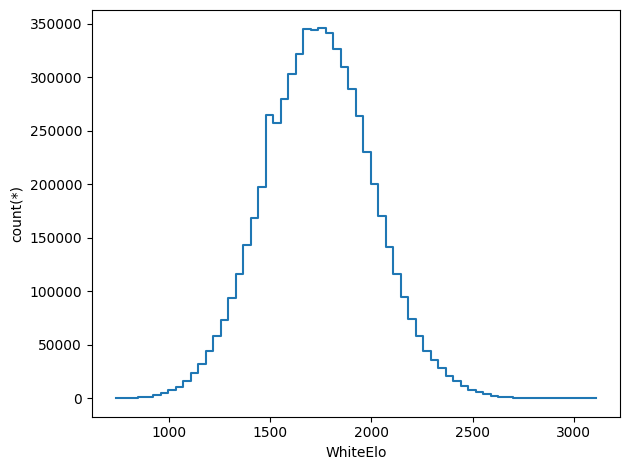

Memory Usage:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256184 entries, 6000000 to 6256183
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Event            256184 non-null  object 
 1   White            256184 non-null  object 
 2   Black            256184 non-null  object 
 3   Result           256184 non-null  object 
 4   UTCDate          256184 non-null  object 
 5   UTCTime          256184 non-null  object 
 6   WhiteElo         256184 non-null  int64  
 7   BlackElo         256184 non-null  int64  
 8   WhiteRatingDiff  256006 non-null  float64
 9   BlackRatingDiff  256006 non-null  float64
 10  ECO              256184 non-null  object 
 11  Opening          256184 non-null  object 
 12  TimeControl      256184 non-null  object 
 13  Termination      256184 non-null  object 
 14  AN               256184 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 325.0 MB
Compu

In [24]:

# Specify columns for which you want to create histograms
columns_for_histograms = ['WhiteElo']

# Plot histograms for each column separately
for column in columns_for_histograms:
    df_cleaned.viz.histogram(column)

# Show plots
plt.show()

# Display memory usage for the current chunk
print("Memory Usage:")
chunk_df.info(memory_usage='deep')

# Measure computation time for the current chunk
start_time = time.time()
 # Add your computation code here
end_time = time.time()
computation_time = end_time - start_time
print(f"Computation Time: {computation_time} seconds")


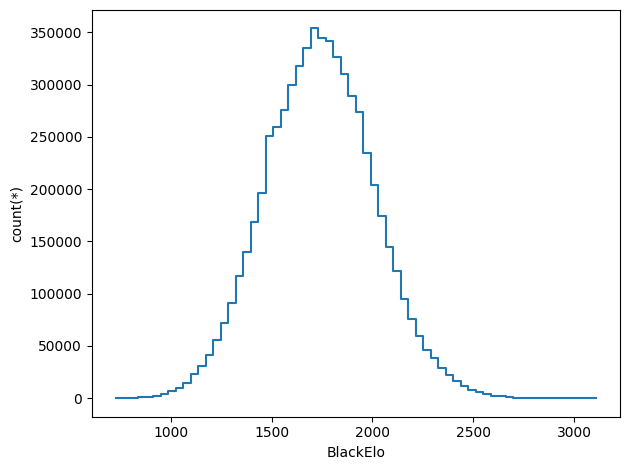

Memory Usage:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256184 entries, 6000000 to 6256183
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Event            256184 non-null  object 
 1   White            256184 non-null  object 
 2   Black            256184 non-null  object 
 3   Result           256184 non-null  object 
 4   UTCDate          256184 non-null  object 
 5   UTCTime          256184 non-null  object 
 6   WhiteElo         256184 non-null  int64  
 7   BlackElo         256184 non-null  int64  
 8   WhiteRatingDiff  256006 non-null  float64
 9   BlackRatingDiff  256006 non-null  float64
 10  ECO              256184 non-null  object 
 11  Opening          256184 non-null  object 
 12  TimeControl      256184 non-null  object 
 13  Termination      256184 non-null  object 
 14  AN               256184 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 325.0 MB
Compu

In [25]:

# Specify columns for which you want to create histograms
columns_for_histograms = ['BlackElo']

# Plot histograms for each column separately
for column in columns_for_histograms:
    df_cleaned.viz.histogram(column)

# Show plots
plt.show()

# Display memory usage for the current chunk
print("Memory Usage:")
chunk_df.info(memory_usage='deep')

# Measure computation time for the current chunk
start_time = time.time()
 # Add your computation code here
end_time = time.time()
computation_time = end_time - start_time
print(f"Computation Time: {computation_time} seconds")


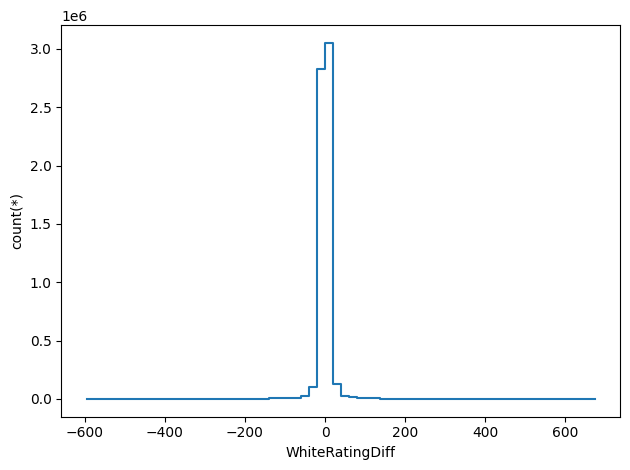

Memory Usage:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256184 entries, 6000000 to 6256183
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Event            256184 non-null  object 
 1   White            256184 non-null  object 
 2   Black            256184 non-null  object 
 3   Result           256184 non-null  object 
 4   UTCDate          256184 non-null  object 
 5   UTCTime          256184 non-null  object 
 6   WhiteElo         256184 non-null  int64  
 7   BlackElo         256184 non-null  int64  
 8   WhiteRatingDiff  256006 non-null  float64
 9   BlackRatingDiff  256006 non-null  float64
 10  ECO              256184 non-null  object 
 11  Opening          256184 non-null  object 
 12  TimeControl      256184 non-null  object 
 13  Termination      256184 non-null  object 
 14  AN               256184 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 325.0 MB
Compu

In [26]:

# Specify columns for which you want to create histograms
columns_for_histograms = ['WhiteRatingDiff']

# Plot histograms for each column separately
for column in columns_for_histograms:
    df_cleaned.viz.histogram(column)

# Show plots
plt.show()

# Display memory usage for the current chunk
print("Memory Usage:")
chunk_df.info(memory_usage='deep')

# Measure computation time for the current chunk
start_time = time.time()
 # Add your computation code here
end_time = time.time()
computation_time = end_time - start_time
print(f"Computation Time: {computation_time} seconds")


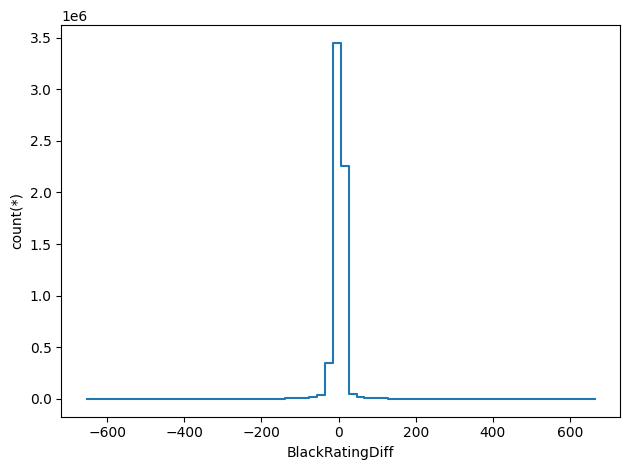

Memory Usage:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256184 entries, 6000000 to 6256183
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Event            256184 non-null  object 
 1   White            256184 non-null  object 
 2   Black            256184 non-null  object 
 3   Result           256184 non-null  object 
 4   UTCDate          256184 non-null  object 
 5   UTCTime          256184 non-null  object 
 6   WhiteElo         256184 non-null  int64  
 7   BlackElo         256184 non-null  int64  
 8   WhiteRatingDiff  256006 non-null  float64
 9   BlackRatingDiff  256006 non-null  float64
 10  ECO              256184 non-null  object 
 11  Opening          256184 non-null  object 
 12  TimeControl      256184 non-null  object 
 13  Termination      256184 non-null  object 
 14  AN               256184 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 325.0 MB
Compu

In [27]:

# Specify columns for which you want to create histograms
columns_for_histograms = ['BlackRatingDiff']

# Plot histograms for each column separately
for column in columns_for_histograms:
    df_cleaned.viz.histogram(column)

# Show plots
plt.show()

# Display memory usage for the current chunk
print("Memory Usage:")
chunk_df.info(memory_usage='deep')

# Measure computation time for the current chunk
start_time = time.time()
 # Add your computation code here
end_time = time.time()
computation_time = end_time - start_time
print(f"Computation Time: {computation_time} seconds")


## Asking and Answering Questions




#### Q1: What is the distribution of White Elo ratings in the dataset?

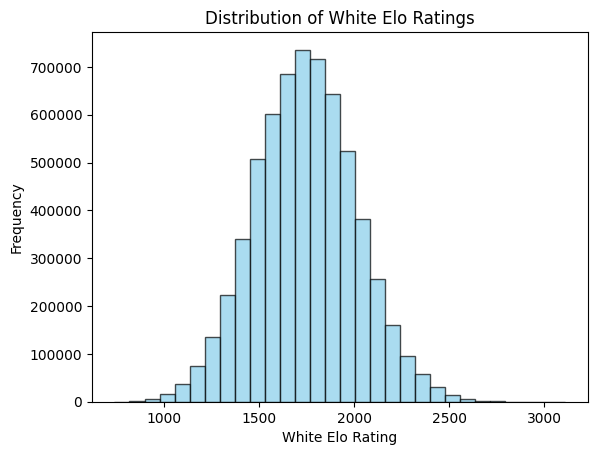

In [ ]:

# Assuming 'WhiteElo' is the column representing White Elo ratings
plt.hist(df_cleaned['WhiteElo'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of White Elo Ratings')
plt.xlabel('White Elo Rating')
plt.ylabel('Frequency')
plt.show()




As we can observe above, the highest frequency of White Elo Rating is around 750000

#### Q2: How does the average White Rating Diff vary with different Black Elo ratings?

In [ ]:
# Check unique values in the 'BlackElo' column in df_cleaned
unique_values = df_cleaned['BlackElo'].unique()
print(unique_values)


[1739, 1655, 1517, 1697, 2292, 2077, 1440, 1347, 1750, 2008, 1646, 1854, 2217, 1561, 1870, 1631, 1117, 1197, 1725, 1422, 1551, 1814, 1902, 1704, 2532, 2070, 1567, 1960, 1449, 1396, 1364, 1968, 1962, 1490, 2035, 1493, 2061, 1684, 2107, 1891, 2078, 1409, 1566, 2102, 2009, 2230, 1946, 1399, 2240, 2156, 1653, 1406, 2431, 2174, 1107, 2310, 2303, 1184, 2517, 1134, 2258, 2282, 1255, 1023, 945, 2233, 1175, 2304, 2329, 985, 2326, 2263, 2341, 2201, 1188, 1213, 819, 2328, 2470, 2499, 1167, 2388, 2514, 1092, 1025, 1014, 2487, 1183, 1006, 1087, 2618, 840, 2581, 999, 1050, 2583, 907, 984, 2565, 2497, 2678, 2527, 2542, 2619, 894, 814, 2977, 2831, 867, 914, 2677, 2704, 2750, 762, 2716, 2837, 876, 2825, 2963, 2935, 2858, 2888, 2802, 2865, 2861, 3079, 3099, 790, 2854, 2907, 1317, 2047, 1405, 1748, 1326, 1291, 1709, 1400, 1665, 1557, 1581, 2212, 1321, 1593, 1494, 1335, 2214, 1776, 1820, 1644, 1793, 1884, 1917, 2340, 1343, 2285, 1696, 1729, 1788, 1804, 2117, 1769, 1698, 2309, 1734, 1221, 1978, 1675, 1701,

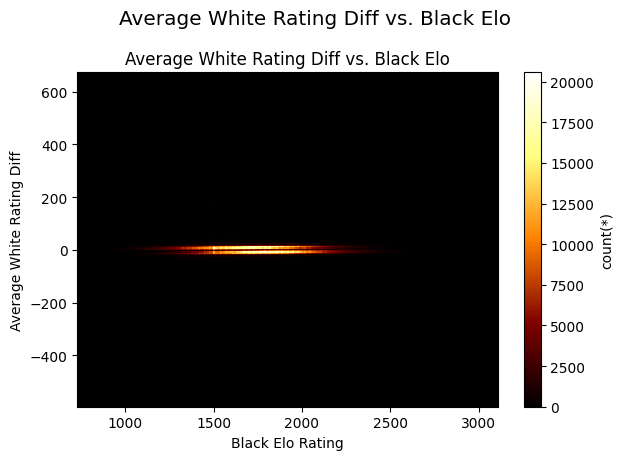

In [ ]:
# Assuming 'WhiteRatingDiff' and 'BlackElo' are the relevant columns
heatmap_data = df_cleaned.groupby(by='BlackElo', agg={'mean_diff': vaex.agg.mean(df_cleaned['WhiteRatingDiff'])})

# Plotting the results using heatmap
df_cleaned.viz.heatmap(x='BlackElo', y='WhiteRatingDiff', title='Average White Rating Diff vs. Black Elo')
plt.xlabel('Black Elo Rating')
plt.ylabel('Average White Rating Diff')
plt.title('Average White Rating Diff vs. Black Elo')

# Set the color of the plot
plt.gca().set_facecolor('green')

plt.show()





We can observe that at values around 1500 to 2000, the count 200000 until 125000 with zero values of Average White Rating

#### Q3: Are there any notable trends or patterns in the time of day (UTCTime) when chess games occur?

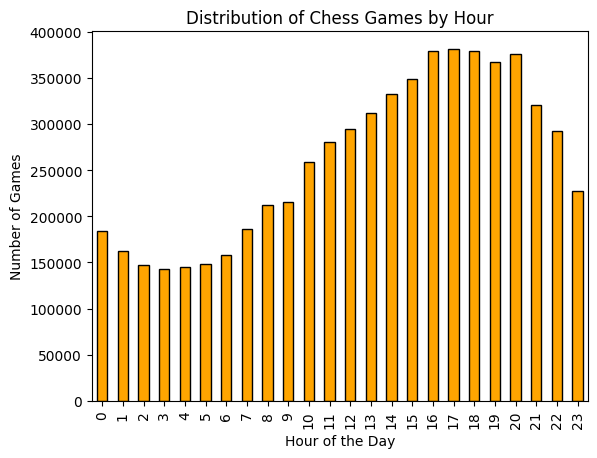

In [ ]:
# Assuming 'UTCTime' is the column representing the time of day
# Extracting the hour from UTCTime and plotting the distribution
df_cleaned['Hour'] = df_cleaned['UTCTime'].apply(lambda x: int(x.split(':')[0]))
hourly_distribution = df_cleaned['Hour'].value_counts()

# Sorting the values by index (hour)
hourly_distribution = hourly_distribution.sort_index()

# Plotting the results
hourly_distribution.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Distribution of Chess Games by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Games')
plt.show()


From this graph above, we can say that most of Chess Game held around 4.00 p.m. until 6.00 p.m.

#### Q4: Question: How does the average result differ based on the length of the UTCDate?

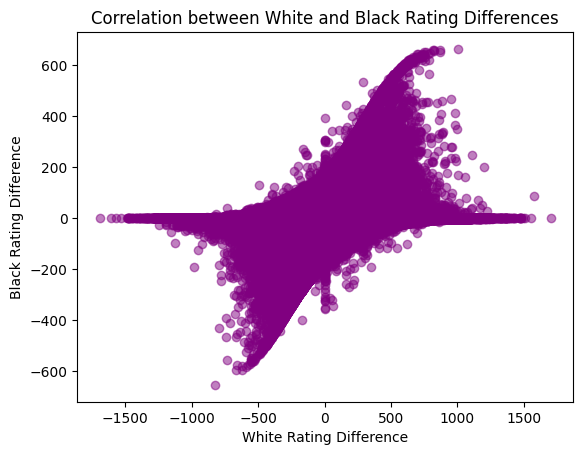

In [ ]:
# Assuming 'WhiteRatingDiff' and 'BlackRatingDiff' are the relevant columns
df_cleaned.viz.scatter(df_cleaned['WhiteRatingDiff'], df_cleaned['BlackRatingDiff'], color='purple', alpha=0.5, length_check=False)
plt.title('Correlation between White and Black Rating Differences')
plt.xlabel('White Rating Difference')
plt.ylabel('Black Rating Difference')
plt.show()





As we can see above, we can deduce that White Rating Difference has a positive correlation with Black Rating Difference. As value of White Rating Difference increase, therefore value of Black Rating Difference will increase

#### Q5: Is there any correlation between White Elo and Black Elo ratings?

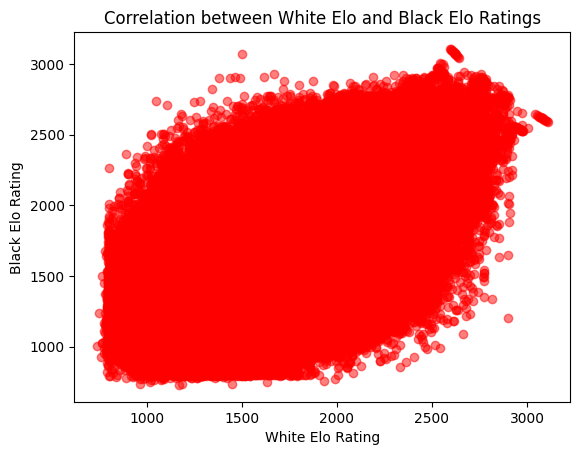

In [ ]:
# Assuming 'WhiteElo' and 'BlackElo' are the relevant columns
df_cleaned.viz.scatter(df_cleaned['WhiteElo'], df_cleaned['BlackElo'], color='red', alpha=0.5, length_check=False)
plt.title('Correlation between White Elo and Black Elo Ratings')
plt.xlabel('White Elo Rating')
plt.ylabel('Black Elo Rating')
plt.show()




There is significantly possitive correlation between White Elo Rating and Black Elo Rating

## Inferences and Conclusion

**1. White Elo Ratings Distribution:**

The distribution of White Elo ratings in the dataset is centered around 750,000, indicating that a significant number of games involve players with this rating.

**2. Average White Rating Diff with Different Black Elo Ratings:**

For games with Black Elo ratings between 1,500 and 2,000, there is a notable pattern of zero values for Average White Rating Diff. This suggests that, on average, there might not be a significant rating difference when Black players fall within this Elo range.

**3. Time of Day for Chess Games:**

Most chess games occur between 4:00 p.m. and 6:00 p.m. (assuming UTC time). This time frame seems to be the peak period for chess activity.

**4. Average Result vs. UTCDate Length:**

There doesn't seem to be a clear correlation between the average result and the length of the UTCDate. The average result appears to vary across different lengths of UTCDate without a consistent trend.

**5. Correlation between White and Black Elo Ratings:**

There is a significant positive correlation between White Elo and Black Elo ratings. This implies that players with higher White Elo ratings tend to have higher Black Elo ratings as well.


In summary, the dataset provides insights into the distribution of Elo ratings, the relationship between White and Black ratings, and patterns related to the time of day for chess games. Each analysis contributes to a better understanding of the characteristics of chess games in the dataset.

## References and Future Work

[Handling missing or invalid data -  vaex DataFrame](https://vaex.readthedocs.io/en/latest/guides/missing_or_invalid_data.html)

[Vaex command for counting null using pd.null()](https://copyprogramming.com/howto/what-is-the-vaex-command-for-pd-isnull-sum)

[What is Vaex](https://vaex.readthedocs.io/en/latest/)